AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [2]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('titanic.csv') 

#Print the first 10 rows of dataset
print("First 10 rows of the dataset:")
print(df.head(10))

#Print the last 20 rows of dataset
print("\nLast 20 rows of the dataset:")
print(df.tail(20))

#Print dataset's information
print("\nDataset information:")
print(df.info())

# Describe the dataset
print("\nDescriptive statistics of the dataset:")
print(df.describe())


First 10 rows of the dataset:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Ti

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in each column:
Age         177
Cabin       687
Embarked      2
dtype: int64


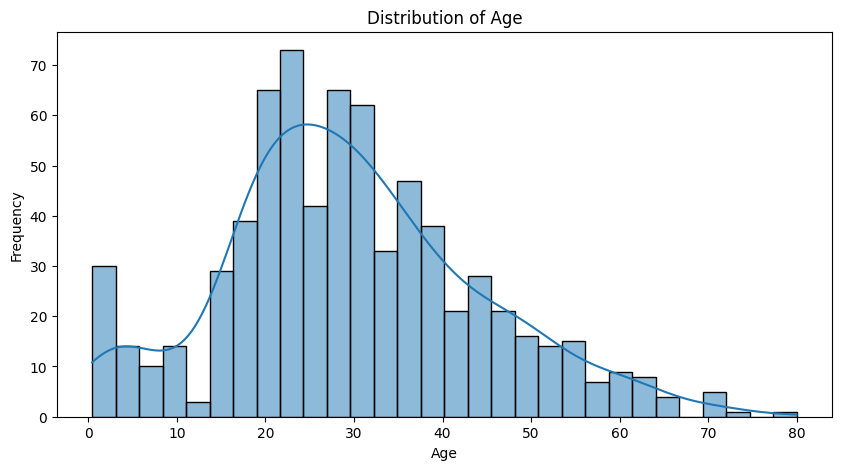

Median Age: 28.0
Unique values in 'Survived': ['0' '1' 'Zero' 'One']
Minimum Fare: nan

Cleaned dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  0 non-null      int64  
 1   Survived     0 non-null      object 
 2   Pclass       0 non-null      int64  
 3   Name         0 non-null      object 
 4   Sex          0 non-null      object 
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      int64  
 7   Parch        0 non-null      int64  
 8   Ticket       0 non-null      object 
 9   Fare         0 non-null      object 
 10  Cabin        0 non-null      object 
 11  Embarked     0 non-null      object 
dtypes: float64(1), int64(4), object(7)
memory usage: 0.0+ bytes
None


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('titanic.csv')

# Find out how many missing values there are in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Handle missing values in the 'Age' column
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Use the median to fill missing values
age_median = df['Age'].median()
print(f"Median Age: {age_median}")

# Fill the missing values in the 'Age' column
df['Age'].fillna(age_median, inplace=True)

# Handle missing values in the 'Cabin' column
# Fill with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

# Handle missing values in the 'Embarked' column
#  Fill missing values with the most common port of embarkation
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

# Handle incorrect data in the 'Survived' column
# Check for unique values in the 'Survived' column
print("Unique values in 'Survived':", df['Survived'].unique())
df = df[df['Survived'].isin([0, 1])]

# Handle incorrectly formatted data in the 'Fare' column
# Check for negative values in 'Fare'
print("Minimum Fare:", df['Fare'].min())
df = df[df['Fare'] >= 0]

# Final dataset after cleaning
print("\nCleaned dataset information:")
print(df.info())


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Number of NaN values in 'Fare' after cleaning: 0
Average Fare by Pclass:
   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


C:\Users\GYM\AppData\Local\Temp\ipykernel_18604\4028615772.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Fare', data=average_fare_by_pclass, palette='viridis')


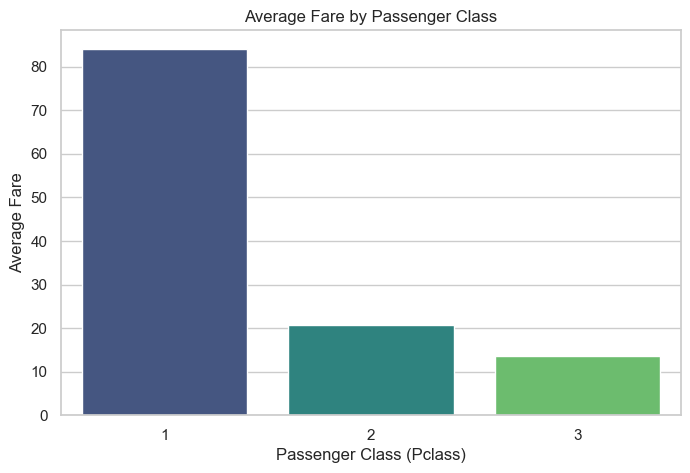

Average Fare by Sex:
      Sex       Fare
0  female  44.479818
1    male  25.523893


C:\Users\GYM\AppData\Local\Temp\ipykernel_18604\4028615772.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Fare', data=average_fare_by_sex, palette='magma')


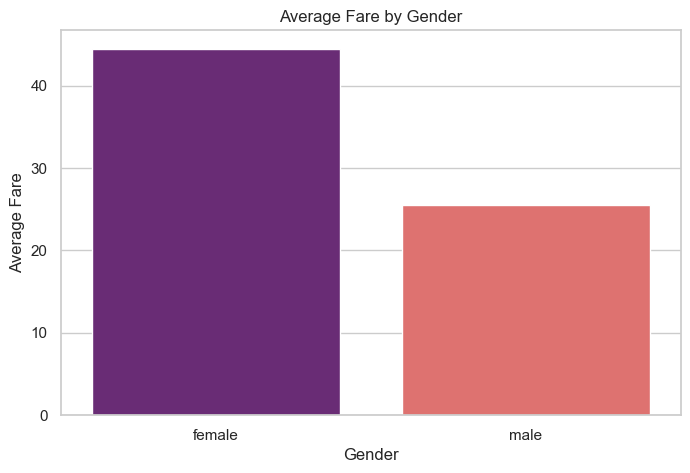

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('titanic.csv')

# Clean the 'Fare' column
# Remove any non-numeric characters 
df['Fare'] = df['Fare'].replace({'\$': '', ',': ''}, regex=True)

# Convert the 'Fare' column to numeric, forcing errors to NaN
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Check for any NaN values in 'Fare' after conversion
print("Number of NaN values in 'Fare' after cleaning:", df['Fare'].isnull().sum())

# Find out the average fare grouped by Pclass
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()
print("Average Fare by Pclass:")
print(average_fare_by_pclass)

# Plot the average fare by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Fare', data=average_fare_by_pclass, palette='viridis')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

# Find out the average fare grouped by Sex
average_fare_by_sex = df.groupby('Sex')['Fare'].mean().reset_index()
print("Average Fare by Sex:")
print(average_fare_by_sex)

# Plot the average fare by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Fare', data=average_fare_by_sex, palette='magma')
plt.title('Average Fare by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()





AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

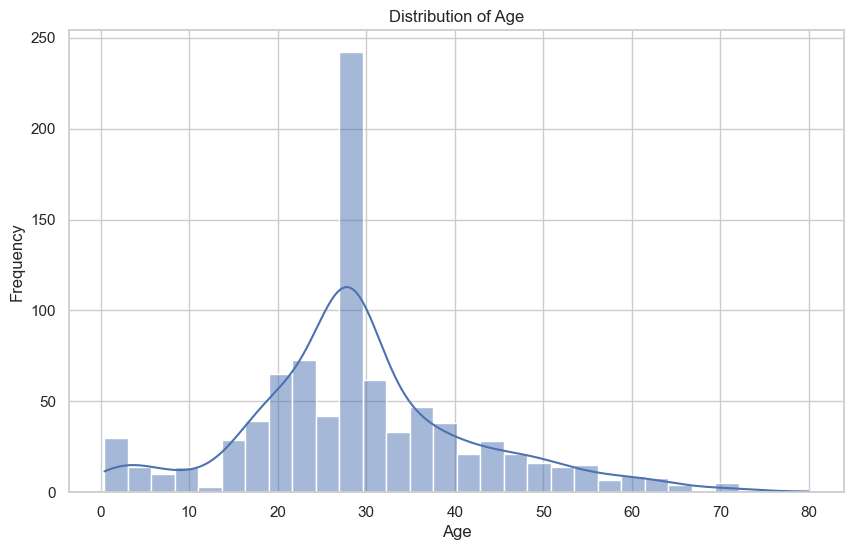

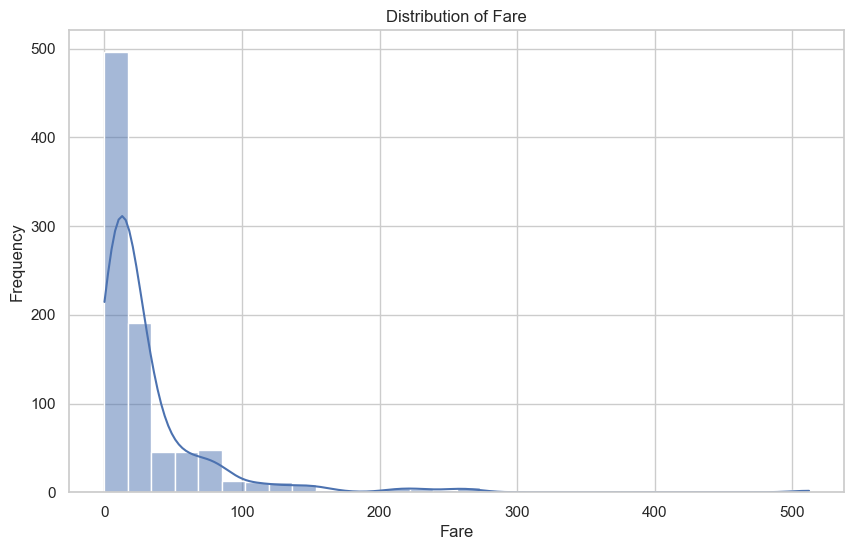

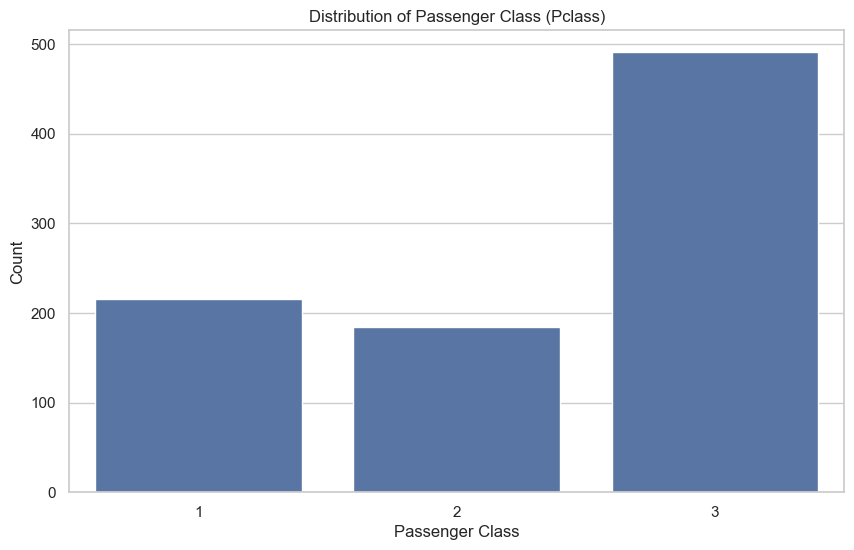

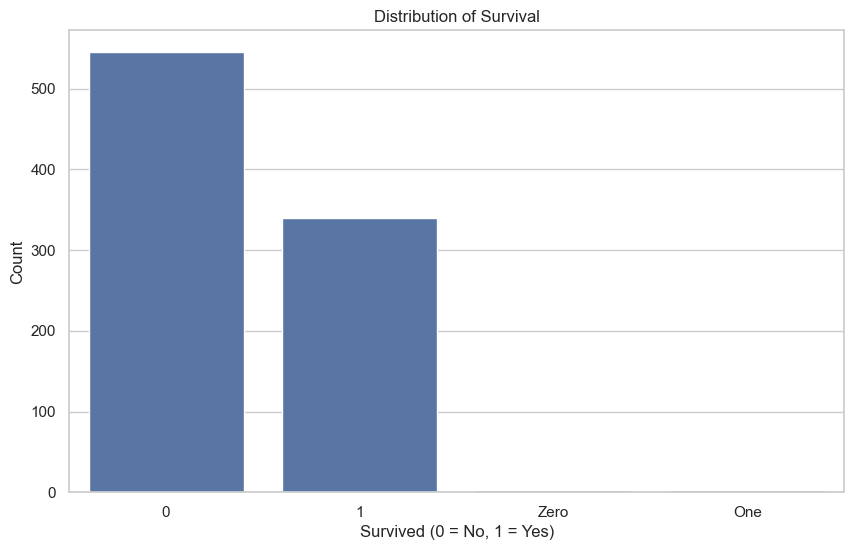

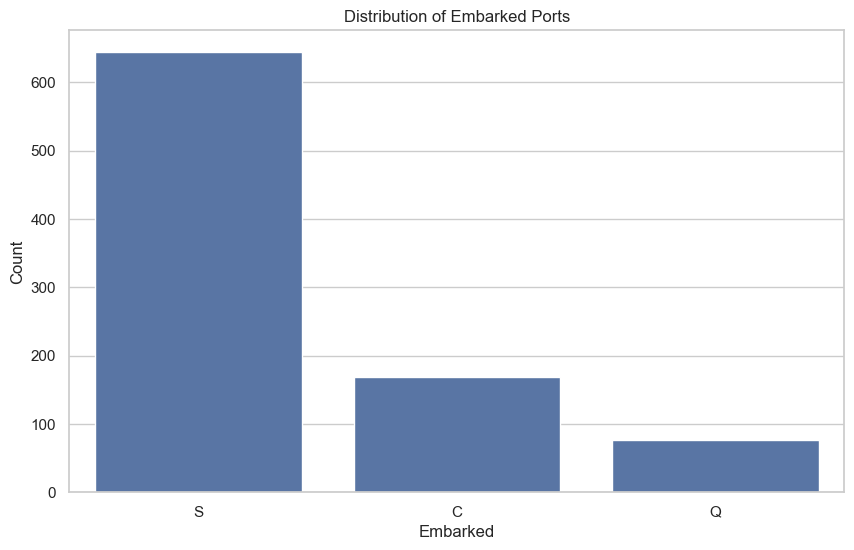

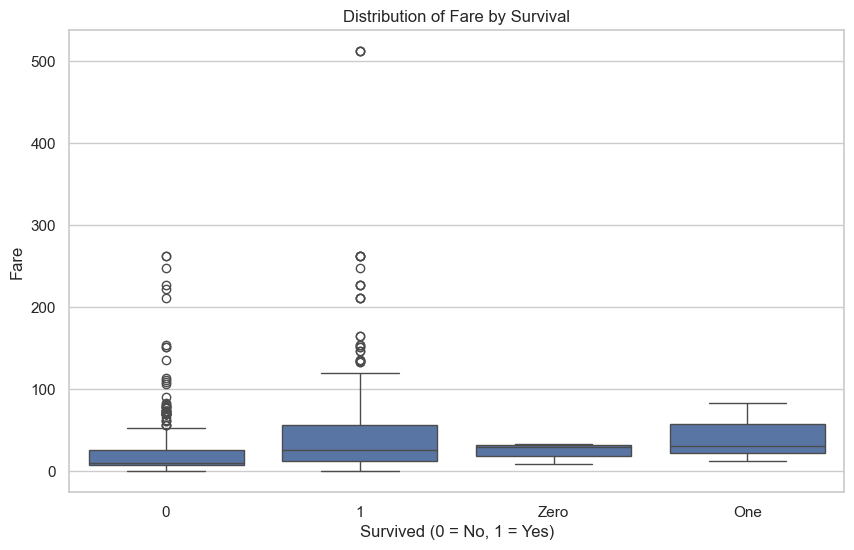

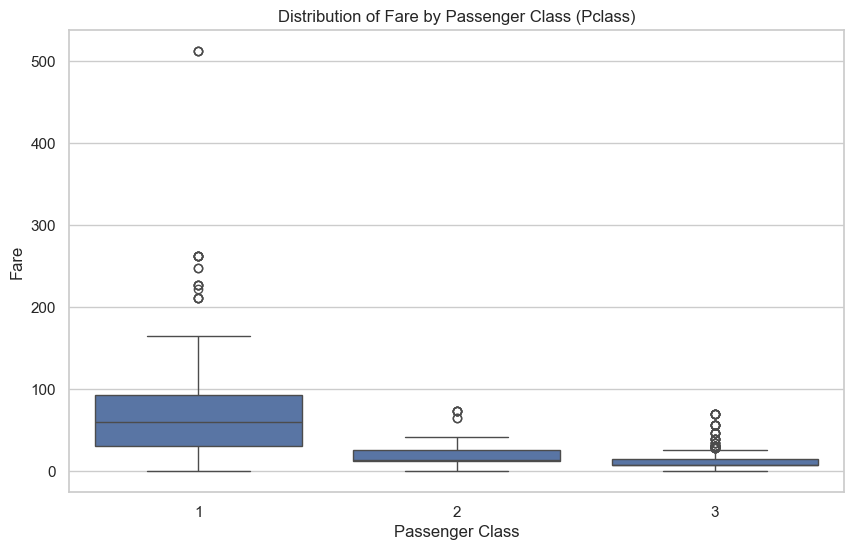

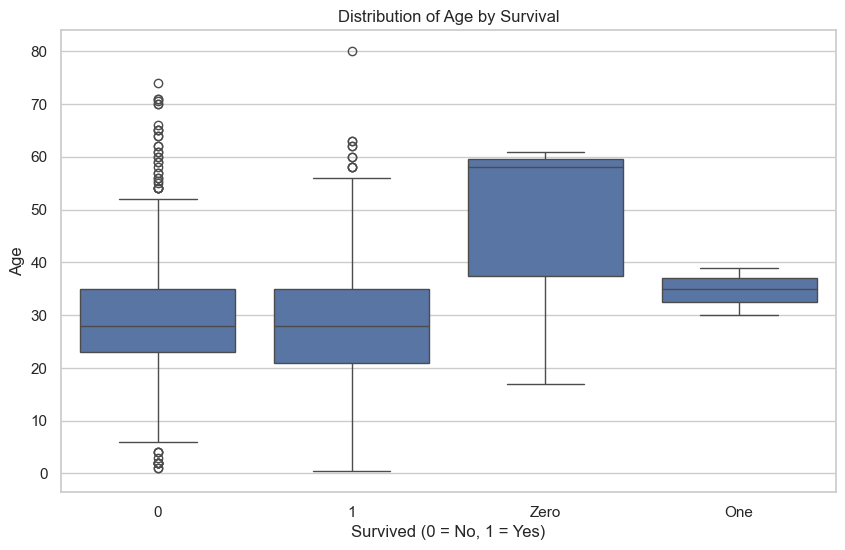

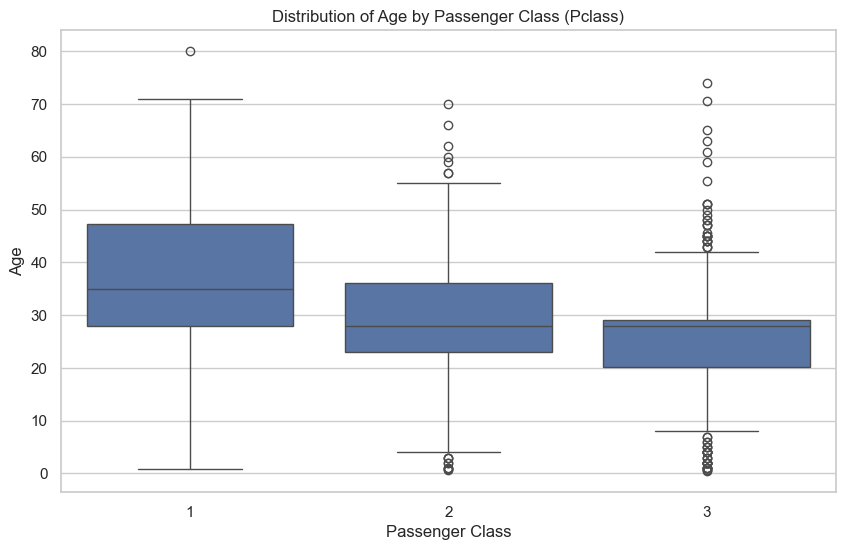

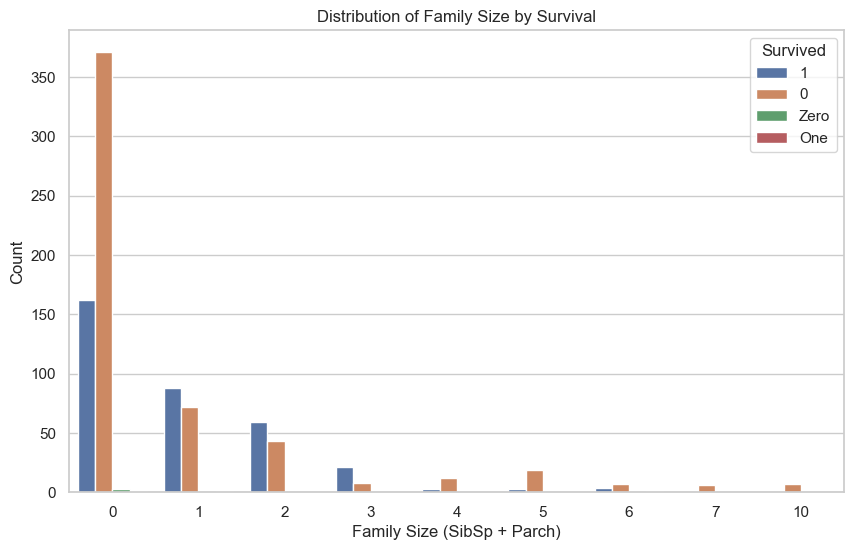

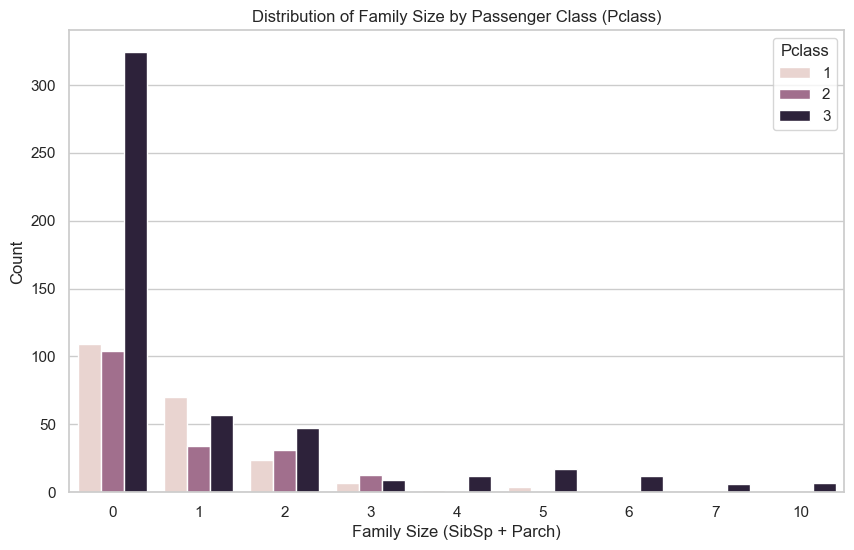

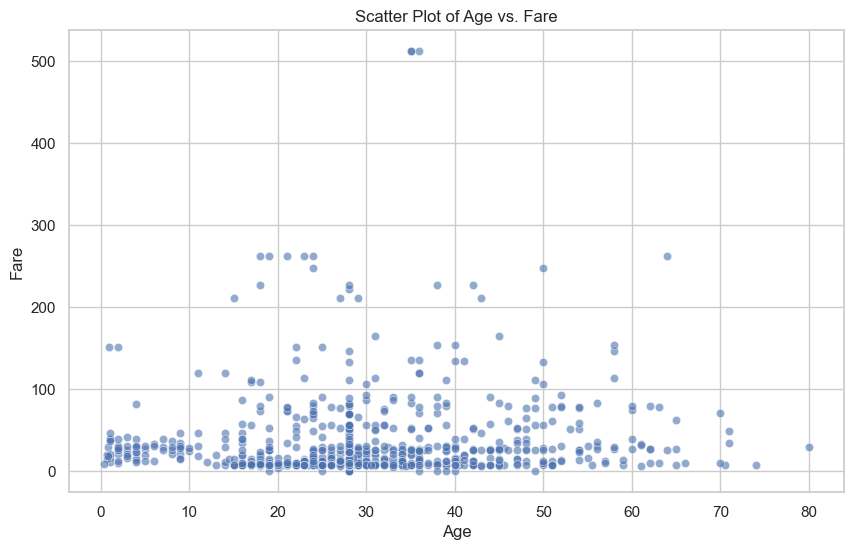

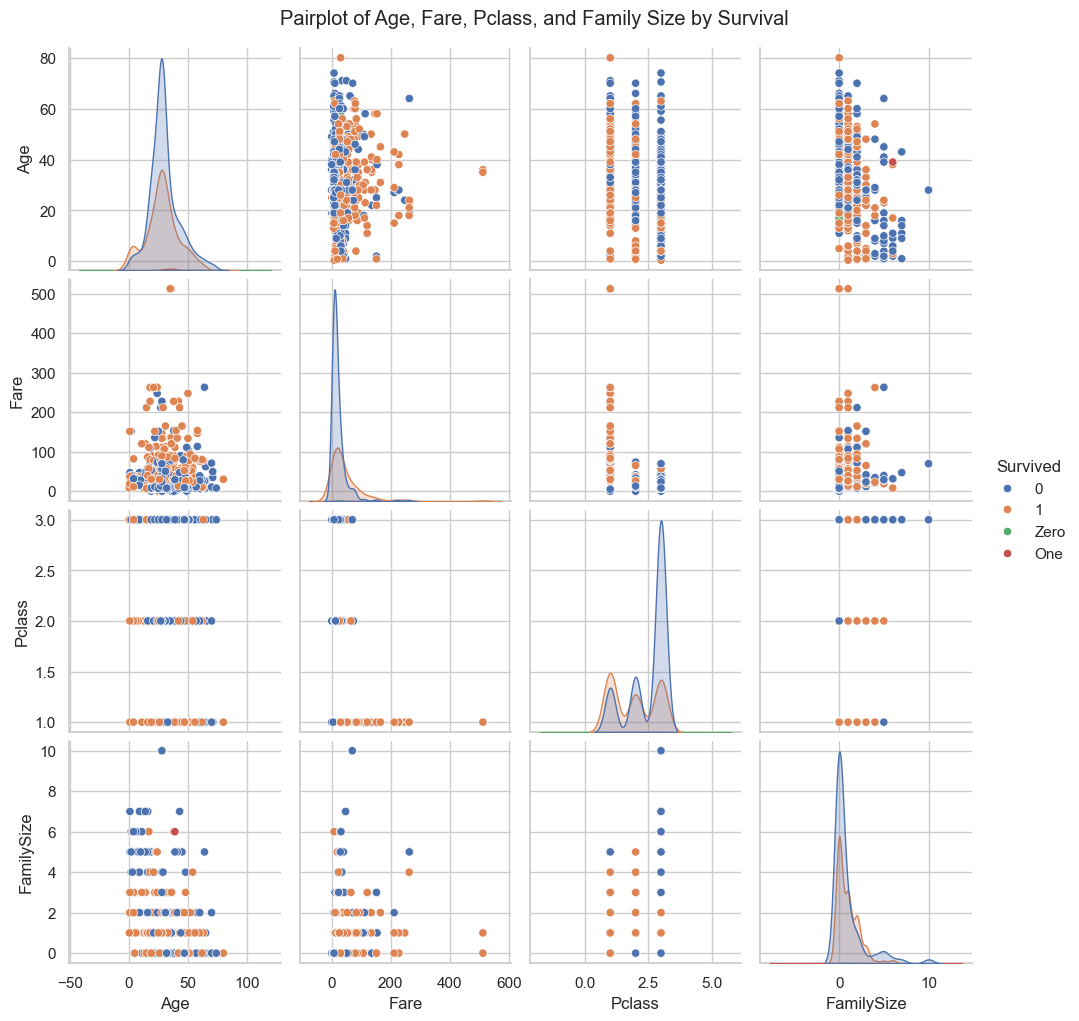

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('titanic.csv')

# Clean the Fare column: remove dollar sign and convert to float
df['Fare'] = df['Fare'].replace({'\$': '', '': None}, regex=True).astype(float)

# Clean the Age column: fill missing values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Combine 'SibSp' and 'Parch' into a new column 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Plot the distribution of 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Plot the distribution of 'Embarked'
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarked Ports')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Distribution of Fare by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Distribution of Fare by Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Distribution of Age by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribution of Age by Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Plot the distribution of 'FamilySize' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Distribution of Family Size by Survival')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.show()

# Plot the distribution of 'FamilySize' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Pclass', data=df)
plt.title('Distribution of Family Size by Passenger Class (Pclass)')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.show()

# Plot the relationship between 'Age' and 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.6)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Other possibilities to show relationships
# Pairplot to show relationships between multiple features
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass', 'FamilySize'])
plt.suptitle('Pairplot of Age, Fare, Pclass, and Family Size by Survival', y=1.02)
plt.show()



AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

Correlation Matrix:
             PassengerId    Pclass       Age     SibSp     Parch      Fare  \
PassengerId     1.000000 -0.035144  0.034212 -0.057527 -0.001652  0.012658   
Pclass         -0.035144  1.000000 -0.339898  0.083081  0.018443 -0.549500   
Age             0.034212 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
SibSp          -0.057527  0.083081 -0.233296  1.000000  0.414838  0.159651   
Parch          -0.001652  0.018443 -0.172482  0.414838  1.000000  0.216225   
Fare            0.012658 -0.549500  0.096688  0.159651  0.216225  1.000000   
FamilySize     -0.040143  0.065997 -0.245619  0.890712  0.783111  0.217138   

             FamilySize  
PassengerId   -0.040143  
Pclass         0.065997  
Age           -0.245619  
SibSp          0.890712  
Parch          0.783111  
Fare           0.217138  
FamilySize     1.000000  

Correlation between 'Age' and 'Fare': 0.0966884221803649
Correlation between 'FamilySize' and 'Fare': 0.2171384070524337


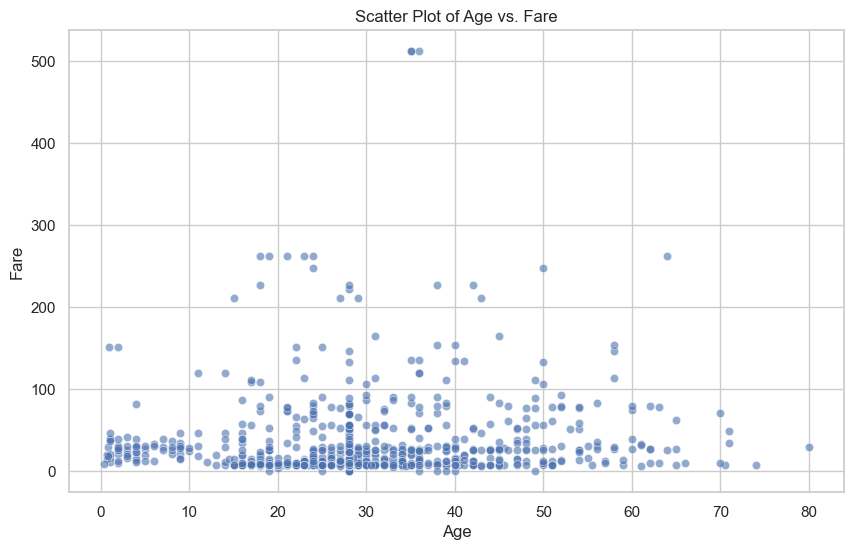

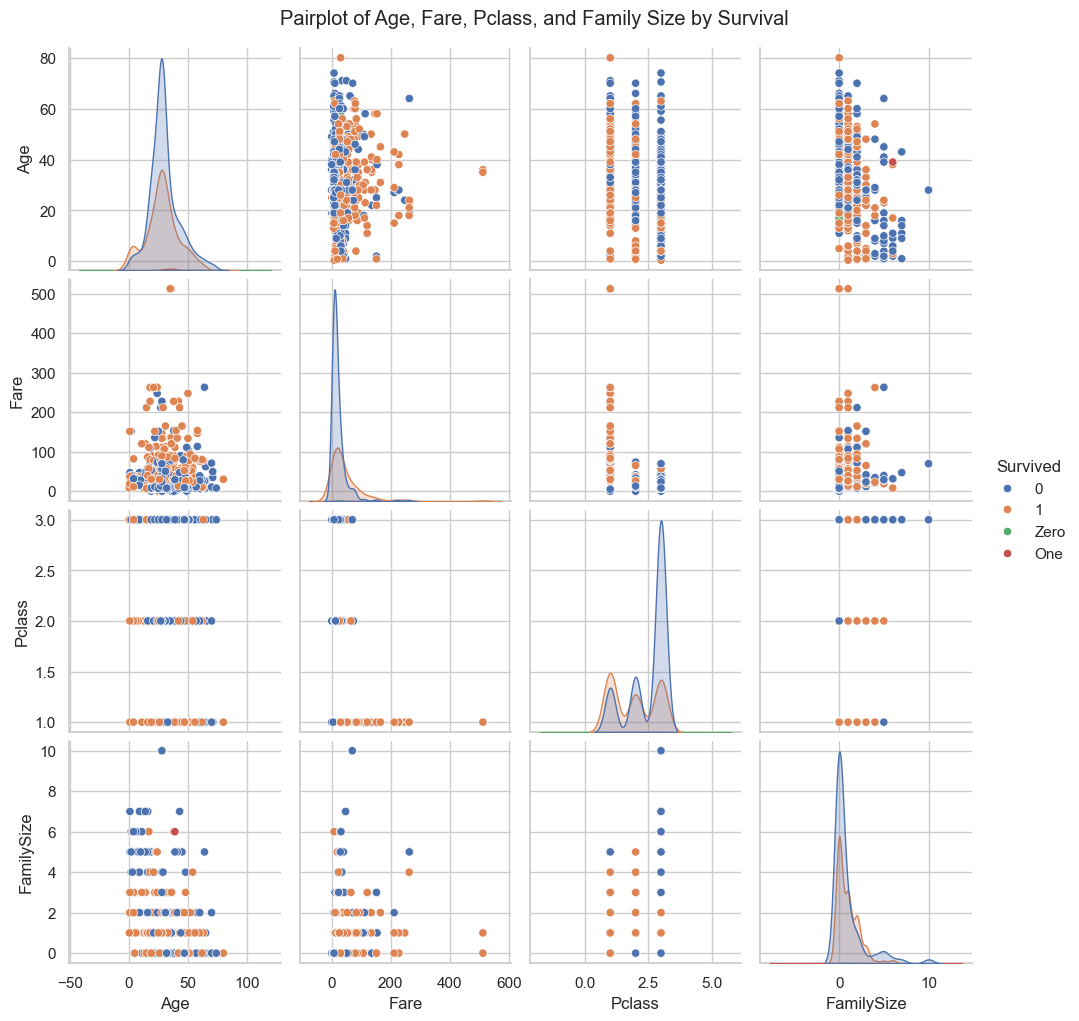

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the dataset
df = pd.read_csv('titanic.csv')

# Clean the Fare column: remove dollar sign and convert to float
df['Fare'] = df['Fare'].replace({'\$': '', '': None}, regex=True).astype(float)

# Clean the Age column: fill missing values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Combine 'SibSp' and 'Parch' into a new column 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Set the style of seaborn
sns.set(style="whitegrid")

# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_df = numeric_cols.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_df)

# Find correlation between 'Age' and 'Fare'
age_fare_correlation = correlation_df.loc['Age', 'Fare']
print(f"\nCorrelation between 'Age' and 'Fare': {age_fare_correlation}")

# Find other possible correlations

family_size_fare_correlation = correlation_df.loc['FamilySize', 'Fare']


print(f"Correlation between 'FamilySize' and 'Fare': {family_size_fare_correlation}")

# Plot the relationship between 'Age' and 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.6)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Pairplot to show relationships between multiple features
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass', 'FamilySize'])
plt.suptitle('Pairplot of Age, Fare, Pclass, and Family Size by Survival', y=1.02)
plt.show()

